# COGS 108 - Final Project 

# Overview

Nowadays, due to the huge variety of moblie applications, the competition inside the market is extremely high. Every application that wants to be successful has to utilize all available data in order to improve its quality and to avoid possible decisions that could detriment its success. Thus, correct analysis of different phenomena related to applications and discovery of any hidden patterns inside relevant data are essential in helping applications achieve these goals.

Our team came up with the idea that an application's name could be an influential indicator of its success, and we hope to explore upon this idea in our project.

## Names

- Aliaksandr Samushchyk
- Jiayi Zhang
- Soumya Agrawal
- Richard Duong
- Titan Ngo
- Yaman El-Jandali

## Group Members IDs

- A15672156
- A14533542
- A14402679
- A15196673
- A15525832
- A15753076

# Research Questions

There are several specific data science questions that we formulated. We expect that the answers to these questions will enable us to approve or disprove our hypothesis.

__1) Main Question: Does the title of an application influence its success?__

Subquestions:

__2) Are there any letters/combinations of letters that tend to be present in more/less successful applications?__

__3) What are the other variables that are significant?__

# Hypothesis

The main hypothesis is the following:
   
    - The title of an application does influence its success. (1)

We came up to this hypothesis because of several reasons. Sometimes it happens that we think about an application, we know it, but we are unable to remember its title. It makes it difficult to find and install this app or to suggest this app to another person. It could also happen that the title is so long to read that we become less interested in it. These ideas gave a rise to the hypothesis (1).  

We predict to measure the success of an application using a few metrics such as the number of installations and the rating of an application.

# Methodology

We will try to answer previously stated questions in our analysis.
First of all, we will introduce our dependent variable (measure of success). In futher text it will be denoted as Y.
Our main goal is to estimate a model (using OLS regression) of the form:

$Y_{i}$ = $β^{T}·$$x_{i}$ + $e_{i}$

Where:
- $β$ is a vector of coefficients, 
- $x_{i}$ - vector of regressors,
- $e_{i}$ - disturbance term;

Remember the OLS assumptions:

1) Linear form

2) Homoscedasticity in errors

3) No multicollinearity

Since there will be a lot of  binary independent variables in out set of regressors(e.g. a column 'z', taking value 1 if an application's name contains 'z' inside it, and zero otherwise), we expect our matrix of regressors suffer from severe multicollinearity. In order to address this issue we will perform __Wilcoxon rank sum test__ on each of these binary variables separetely to determine the most relevant and significant ones. Once we determine such variables, we will keep them in our set of regressors. With the help of this procedure our attempt to satisfy third OLS assumption will have high chances to succeed.

Then, we will run our OLS regression(__simple OLS__). Immideately after that, we will be able to perform __Breusch-Pagan test__ to see whether the errors of regression satisfy the second assumption. If they do not satisfy, we will run new regression. It will be still __OLS regression__, but this time it will be __robust to heteroscedasticity__ in errors.
The reason why simple OLS(without robustness check) first is that if the errors of that regression satisfy the second assumption, the standard errors of estimated coefficients will be lower but still valid and correct. Thus, the p-values will also be lower and more accurate.

# Background and Prior Work

The dataset that we found presents a lot of interesting insights about user
preferences, and we want to explore the effects of certain user preferences on app
rating and popularity.
There is not a lot of background knowledge that we know about user preferences
affecting app popularity other than the obvious correlations between app
rating/popularity, so we would like to use the data to try and find more subtle biases
that might affect it such as title/title length, etc.

References:
- 1)
“A Statistical Analysis of the Apple App Store” by Colin Eberhardt
Did a statistical analysis of prices of apps in the Apple App store. Did not do much
other than basic statistical analysis, such as looking at the genre distribution of apps
and the price differences across genres. Found a positive correlation between price
and app rating.
Source: https://blog.scottlogic.com/2014/03/20/app-store-analysis.html
- 2)
Did a statistical analysis of various factors that contribute to the success of an app in
the Google Play Store. Found that most free apps are monetized by advertisements.
Learned that ~80% of apps on the playstore have been downloaded less than 50k
times. Found that a small amount of users who install actually take the time to write
a review.
Source:
https://nycdatascience.com/blog/student-works/web-scraping/analysis-of-apps-in-the-google-play-store/

The scope of our project is a bit beyond the analysis that these projects present, but
in a similar vein. While these projects analyzed the more basic factors that weigh in
the success of an app, we will be focusing more on subtle user preferences that are
not as obvious to correlate to success.

# Dataset

- Dataset Name: Google Play Store Apps
- Link to the dataset: https://www.kaggle.com/lava18/google-play-store-apps?fbclid=IwAR0I6EIgxdnc3LWhwVVg85gZ9RokprTW6xDo47EQxwDu5Qkce24ZC2MbIBs#googleplaystore_user_reviews.csv

Our dataset is the Google Play Store Apps data, which is web scraped from the Google Play Store and presented in a csv format on Kaggle. 

This dataset provides up with a zipped folder containing two files. The first file, googleplaystore_user_reviews,  has around 64.3k observations, with 5 variables/columns. These include the app name, translated review, sentiment, sentiment polarity, and sentiment subject. Most of these variables have been preprocessed already, such as the translated review and sentiment. Many observations in this file (or the reviews), are for the same app. For our project, we will not be focusing on the specific text in the reviews, so this file will not be used. Our project focuses on the second file, googleplaystore. As for the second file, there are around 10.8k observations with 13 variables. The variables include app name, category of the app, the overall user rating, number of reviews, size of the app, number of installs, whether the app is paid or free,  the price of the app, the content rating, the genres, when the data was last updated, the current version of the app available on the app store, and the minimum required Android version for the app. 

With this data, we can analyze different features of the app to help determine what makes an app successful and help future app developers to attain success in the Android market. Specifically, we will focus on determining factors other than the rating or number of installs to determine an app’s popularity. For this purpose, we will focus on an app’s title/name, an app’s size, an app’s price, and compare these variables with the number of reviews, an app’s rating, and the number of installs. 

We can use an apps title by doing analysis on the length of the title, letters used, and specific combinations used to determine if certain letters, combinations, or title lengths are features of more successful apps. Using the app’s size, we can determine if smaller apps are more likely to be successful. Using the app’s price, we can see if free apps appeal to consumers more and are more popular than paid apps. We can analyze the number of reviews, an app’s rating, and the number of installs to determine what will be the best dependent variable for us to compare the previous features to. Features like the category, when the app was last updated, the current version of the app available on the app store, and the minimum required Android version for the app are variables that we will not analyze in our data as we are focusing our question on the title of the app rather than its “technical” features.

# Setup

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns\

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [2]:
# We decided to configure out settings exactly like we did for A2

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Wrangling

We have two main files in our data set: googleplaystore.csv and googleplaystore_user_reviews.csv.

For an analysis of app names, we can focus on just the first data set. The second data set gives us reviews of each app, which is not needed for this particular project since we're focusing on app titles.


#### Brief Overview

Before beginning our analysis, we cleaned our data in several key stages.

1. Loaded Data
2. Previewed Size and Information 
    - Determined what information/columns are most relevant
3. Removed Duplicates
4. Removed NaN
5. Pre-Processing
    - Converted strings to numeric values
    - Removed nonsensical data points (e.g. negative ratings, etc...)
    - Addressed concerns regarding outliers


In [3]:
df = pd.read_csv("google_play_dataset/googleplaystore.csv")

In [4]:
# Preview dataset and get a grasp on its size
df

,App,Category,Rating,Reviews,...,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,...,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,...,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,...,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
...,...,...,...,...,...,...,...,...,...
10838,Parkinson Exercices FR,MEDICAL,NaN,3,...,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,...,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,...,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Show the headers of the different columns
print(list(df.columns.values))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [6]:
# Remove any duplicate applications
# We only want to account for each app once 
df.drop_duplicates(['App'], inplace = True)

In [7]:
# We decided that we only need the app names, ratings, and number of installations. 
df = df[['App', 'Rating', 'Installs', 'Price', 'Size', 'Reviews', 'Category']]

After previewing our dataset, with 10841 observations and 13 variables, we realized that it has a lot of data we do not need.

The __'Size'__ of apps, the __'Type'__ (either free or paid), __'Price'__, __'Content Rating'__ (as in the rating for the suggested age group), the date of when they were __'Last Updated'__, the __'Genres'__ and __'Category'__, and the versions (__'Current Ver'__ and __'Android Ver'__) have little to do with our analysis of specific characterisitcs of the length of title strings, so those columns were dropped.

Our project seeks to see any relationship between characteristics of apps' titles with their success. However, we do not have any direct measure of this ___"Success"___. We decided to keep the __'Rating'__ and __'Installs'__ columns to determine ___"Success"___, but we still want to look at the distributions/correlations of these variables before committing to a specific method of calculation.

In [8]:
# Count amount of missing values in the dataset 
app_nans = df['App'].isna().sum()
rating_nans = df['Rating'].isna().sum()
installs_nans = df['Installs'].isna().sum()
print("app_nans:", app_nans,"\nrating_nans:", rating_nans,"\ninstalls_nans:", installs_nans)

app_nans: 0 
rating_nans: 1463 
installs_nans: 0


There seems to be a considerable amount of observations with missing values. However, the only column in our current dataset that has missing values is __'Ratings'__. Since we absolutely need ratings values for every observation that we have, we will drop all of the observations without them.

In [9]:
# Drops observations missing 'Ratings' data
df = df.dropna()

# Preview the dataframe
df

,App,Rating,Installs,Price,Size,Reviews,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,"10,000+",0,19M,159,ART_AND_DESIGN
1,Coloring book moana,3.9,"500,000+",0,14M,967,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,"5,000,000+",0,8.7M,87510,ART_AND_DESIGN
...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,5.0,100+,0,3.6M,4,FAMILY
10839,The SCP Foundation DB fr nn5n,4.5,"1,000+",0,Varies with device,114,BOOKS_AND_REFERENCE
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,"10,000,000+",0,19M,398307,LIFESTYLE


### Data Pre-Processing & Exploratory Data Analysis

It turns out that the 'Installs' column is a column of strings instead of numbers. We want to convert these strings into numeric values so that we can plot them.

In [10]:
# Delete the '+' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace('+', '')
# Delete the ',' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace(',', '')

# Type cast these strings into integers
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

#change 'M' to E6 in the Reviews column so that millions can be properly converted numerically
df['Reviews'] = df['Reviews'].str.replace('M', 'E6')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='raise')

#Remove the 'M' which signifies megabytes in the Size column, make everything in units of kilobytes
df['Size'] = df['Size'].str.replace('M', 'E3')
df['Size'] = df['Size'].str.replace('k', '')
df['Size'] = df['Size'].str.replace(',', '')

#We will also remove apps that have varying sizes since we won't be able to model these variations
df['Size'] = df['Size'].replace({'Varies with device': '-1'}, regex=True)
df['Size'] = df['Size'].str.replace('+', '')
df['Size'] = pd.to_numeric(df['Size'], errors='raise')

#Remove sizes that don't make any sense and ones we flagged to be removed earlier
df = df.drop(df[df.Size <= 0].index)

#Remove the money sign from app price
df['Price'] = df['Price'].str.replace('$', '')

#Set apps with the price of "Everyone" to be removed
df['Price'] = df['Price'].str.replace('Everyone', '-1')

#Change price to be a numeric column
df['Price'] = pd.to_numeric(df['Price'], errors='raise')

#Remove prices that don't make sense
df = df.drop(df[df.Price < 0].index)
# Preview the dataframe
# Values in 'Installs' should be numeric
df

,App,Rating,Installs,Price,Size,Reviews,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04,0.0,19000.0,159.0,ART_AND_DESIGN
1,Coloring book moana,3.9,5.00e+05,0.0,14000.0,967.0,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06,0.0,8700.0,87510.0,ART_AND_DESIGN
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,5.00e+03,0.0,53000.0,38.0,FAMILY
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02,0.0,3600.0,4.0,FAMILY
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07,0.0,19000.0,398307.0,LIFESTYLE


Since we need some measures of title length, we will create two columns: __'Word Count'__ (counts the number of words in the title) and __'Char Count'__ (counts the number of characters in the title).

In [11]:
# Create the word count column 
df['Word Count'] = df['App'].str.split().str.len()

In [12]:
# Create the char count column 
df['Char Count'] = df['App'].str.len() - df['App'].str.count(' ')

In [13]:
# Preview table again to check for these columns
df

,App,Rating,Installs,Price,...,Reviews,Category,Word Count,Char Count
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04,0.0,...,159.0,ART_AND_DESIGN,9,38
1,Coloring book moana,3.9,5.00e+05,0.0,...,967.0,ART_AND_DESIGN,3,17
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06,0.0,...,87510.0,ART_AND_DESIGN,10,41
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,5.00e+03,0.0,...,38.0,FAMILY,4,13
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02,0.0,...,4.0,FAMILY,5,28
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07,0.0,...,398307.0,LIFESTYLE,7,39


We also want to add columns regarding the frequency of certain letters and letter pairs.

The code below creates many columns with binary variables depending on the presence of letters and letter pairs. For example, values in column 'a' are equal to 1 if 'a' is contained in apps name and 0 otherwise, and values in column 'wq' are equal to 1 if 'wq' is contained in apps name and 0 otherwise.

Then, we count how many ones are in each of the created columns to assess if the column is useful. If there are not a lot of ones in a column (less than 0.025 * (# of rows) for example) or too many (more than 0.975 * (# of rows) for example), we remove such columns. This is done because, for example, there are not a lot of titles with 'wq' inside them so 'wq' column is not useful for our analysis

In [14]:
import string
alphabet = list(string.ascii_lowercase)

for k in alphabet:
    q1 = []
    for i in df['App']:
        if k in i:
            q1.append(1)
        else:
            q1.append(0)
    df[k] = q1

alphabet1 = []
for i in alphabet:
    for k in alphabet:
        alphabet1.append(i + k)
        
for k in alphabet1:
    q2 = []
    for i in df['App']:
        if k in i:
            q2.append(1)
        else:
            q2.append(0)
    df[k] = q2


rem_list = []                           ##here 13 and 715 are indexes of first and last created columns  
for i in range(13,707):                 ##it is possible when you will try to execute code you will need to insert proper values 
    if sum(df[df.columns[i]]) < 0.025*df.shape[0] or sum(df[df.columns[i]]) > 0.975*df.shape[0]:
        rem_list.append(i)


s = 0
for i in rem_list:
    i = i - s
    del df[df.columns[i]]
    s += 1

In [15]:
# Preview new dataset
df

,App,Rating,Installs,Price,...,zw,zx,zy,zz
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04,0.0,...,0,0,0,0
1,Coloring book moana,3.9,5.00e+05,0.0,...,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06,0.0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,5.00e+03,0.0,...,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02,0.0,...,0,0,0,0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07,0.0,...,0,0,0,0


In [16]:
# Preview the columns of some example letters
df[['a','b','c']]

,a,b,c
0,1,0,1
1,1,1,0
2,1,0,1
...,...,...,...
10836,1,0,1
10837,1,0,1
10840,1,0,1


In [17]:
# Viewing general statistics of our data
df.describe()

,Rating,Installs,Price,Size,...,zw,zx,zy,zz
count,7027.00,7.03e+03,7027.00,7027.00,...,7027.0,7027.0,7.03e+03,7.03e+03
mean,4.16,4.47e+06,1.17,21754.43,...,0.0,0.0,2.28e-03,7.54e-03
std,0.56,2.71e+07,18.20,22726.50,...,0.0,0.0,4.77e-02,8.65e-02
...,...,...,...,...,...,...,...,...,...
50%,4.30,1.00e+05,0.00,13000.00,...,0.0,0.0,0.00e+00,0.00e+00
75%,4.50,1.00e+06,0.00,31000.00,...,0.0,0.0,0.00e+00,0.00e+00
max,5.00,1.00e+09,400.00,100000.00,...,0.0,0.0,1.00e+00,1.00e+00


### Data Wrangling Conclusion


Looking at our table at the beginning and near the end, we were fairly lucky with our dataset. We were able to keep the majority of our values since we were looking at features that are fairly simple numerical values. App data seems to be fairly easy to work with and most of the data points we will be analysing are fairly simple numerical values. Additionally, the data uploaded was scraped from Google Play store and is fairly reliable since it is all publicly available. Thanks to the simplicity of our data points, by this point our data is ready for us to utilize in our analysis and visualization.

However, there were some issues that we ran into that may affect the accuracy of our analysis. The number of installations is rounded and is not a continuous value. Additionally, we suspect succesful apps are more likley to snowball and become more succesful thus creating a gap between apps with very little success and significant success. Distribution is additionally addressed later in the notebook and transformations we used can be seen in the visualization section. Lastly, rating may be rather unreliable when an app has too few reviews. 

Even with this potential flaws in the data, however, we are confident we can still extrapolate information from our data and answer our hypothesis.

<br>

## Let's Start Plotting!

### Plotting the indivdual variables

#### Rating

Text(0.5, 1.0, 'Distribution of App Ratings')

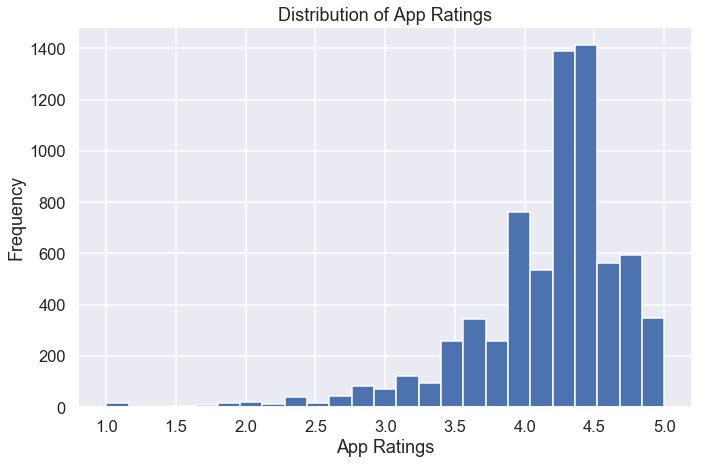

In [18]:
# Plots 'Rating' (which is a value from 0 to 5) to see its distribution
df['Rating'].plot.hist(bins = 25, figsize=(11,7))
plt.xlabel('App Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')

Ratings in the Google Play Store can only be values in the range between 0 and 5! There are some ratings that are past the maximum 5 stars, so we will remove those.

In [19]:
# Drops invalid ratings (greater than 5) 
df = df[df.Rating <= 5]

Text(0.5, 1.0, 'Distribution of App Ratings')

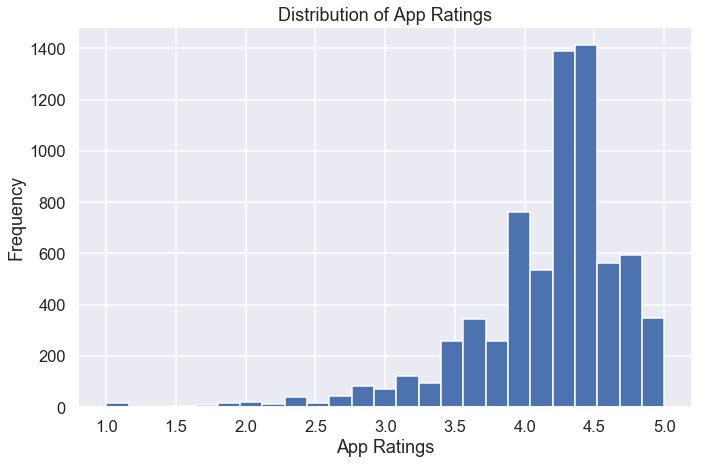

In [20]:
# Plots 'Rating' of apps (which are values from 0 to 5) to see its distribution
df['Rating'].plot.hist(bins = 25, figsize=(11,7))
plt.xlabel('App Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')

After removing the invalid values, we are able to get a better idea of the distribution of the ratings ranging from 0 to 5. The graph aboves shows us that there is a greater number of apps that are rated from 2.5-5 than 0-2.5. In other words, there is a negative skew.

In [21]:
# Calculate the mean of 'Rating'
mean = df['Rating'].mean()
median = df['Rating'].median()
print(" The mean is:", mean, '\n', "The median is:", median)

 The mean is: 4.160623310089655 
 The median is: 4.3


From the above histogram, we can say that most apps have high ratings, (with a mean rating of ~4.17) probably due to peoples' rating tendencies. Distribution-wise, __ratings are skewed left__.

#### Word Count

Text(0.5, 1.0, 'Distribution of App Title Word Count')

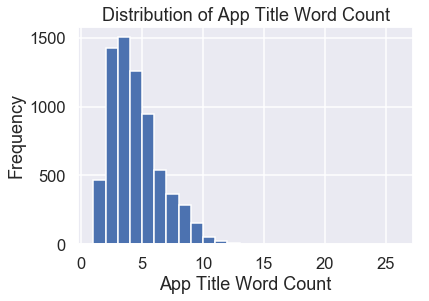

In [22]:
# Plots 'Word Count' of app titles to see its distribution
df['Word Count'].plot.hist(bins = 25)
plt.xlabel('App Title Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of App Title Word Count')

The plot above has a lot of empty space probably due to the presence of outliers. Let's confirm this.

In [23]:
# Print the max and min of 'Word Count'
minValue = df['Word Count'].min()
maxValue = df['Word Count'].max()
print(" The min is:", minValue, '\n', "The max is:", maxValue)

 The min is: 1 
 The max is: 26


There is a title with 26 words!

Since it is generally accepted to do so, we will be removing all outliers 2 standard deviations away form the mean. By convention, values within two standard deviations of the mean (plus or minus) contain 95% of all the points.

In [24]:
# We first store the values of the std and the mean.

wordCountSD = df['Word Count'].std()
wordCountMean = df['Word Count'].mean()

# We then remove outliers
df = df.drop(df[(df['Word Count'] < (wordCountMean - 2*wordCountSD)) | (df['Word Count'] > (wordCountMean + 2*wordCountSD))].index)


Text(0.5, 1.0, 'Distribution of App Title Word Count')

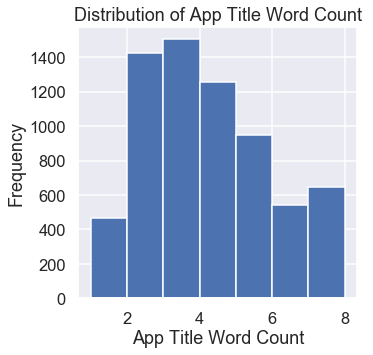

In [25]:
# Plots 'Word Count' of app titles to see its distribution
df['Word Count'].plot.hist(bins = 7, figsize=(5,5))
plt.xlabel('App Title Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of App Title Word Count')

In [26]:
# Calculate the mean and median of 'Word Count'
mean = df['Word Count'].mean()
median = df['Word Count'].median()
print(" The mean is:", mean, '\n', "The median is:", median)

 The mean is: 3.7776302198612957 
 The median is: 3.0


In [27]:
# Print the max and min of 'Word Count'
minValue = df['Word Count'].min()
maxValue = df['Word Count'].max()
print(" The min is:", minValue, '\n', "The max is:", maxValue)

 The min is: 1 
 The max is: 8


From the above histogram, we can say that most apps have relatively low word count (with a mean of ~3.79). Word count is ___slightly_ skewed to the right__.

#### Char Count

Text(0.5, 1.0, 'Distribution of App Title Char Count')

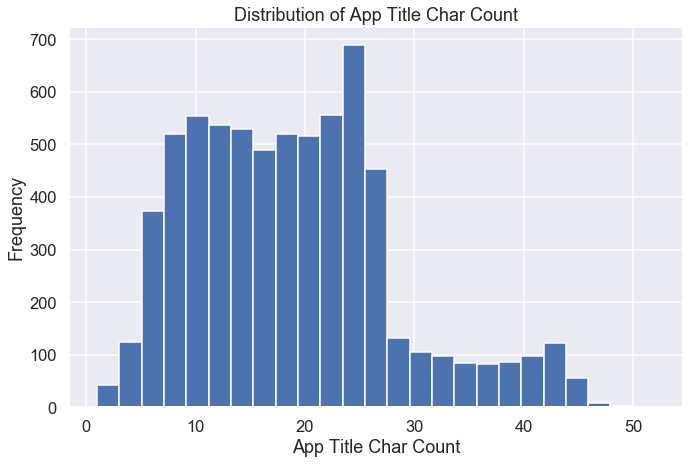

In [28]:
# Plots 'Char Count' app titles to see its distribution
df['Char Count'].plot.hist(bins = 25, figsize=(11,7))
plt.xlabel('App Title Char Count')
plt.ylabel('Frequency')
plt.title('Distribution of App Title Char Count')

In [29]:
# Print the max and min of 'Char Count'
minValue = df['Char Count'].min()
maxValue = df['Char Count'].max()
print(" The min is:", minValue, '\n', "The max is:", maxValue)

 The min is: 1 
 The max is: 52


In [30]:
# Calculate the mean and median of 'Char Count'
mean = df['Char Count'].mean()
median = df['Char Count'].median()
print(" The mean is:", mean, '\n', "The median is:", median)

 The mean is: 19.040283311199644 
 The median is: 18.0


Char count has a mean of ~19.22.

By the graph above, we can say that __char count is right skewed__.

#### Installs

Text(0.5, 1.0, 'Distribution of Number of Installs')

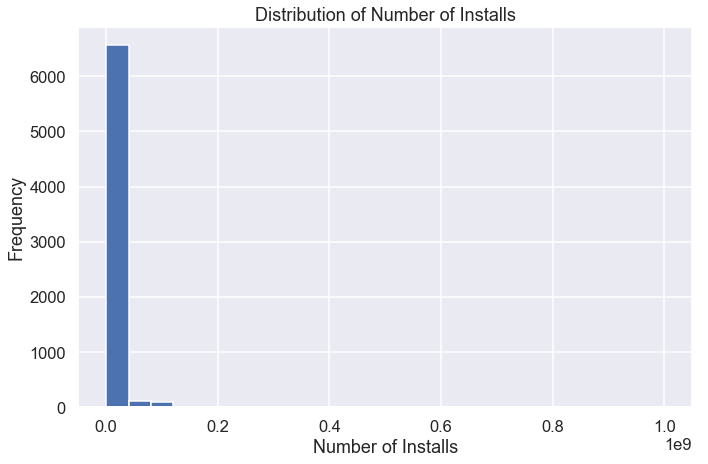

In [31]:
# Plots 'Installs' to see its distribution
df['Installs'].plot.hist(bins = 25, figsize=(11,7))
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Installs')

In [32]:
df['Installs'].unique()

array([5.e+05, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+04, 1.e+07, 5.e+03,
       5.e+06, 1.e+08, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01, 1.e+09,
       5.e+00, 5.e+01, 1.e+00])

__TODO__

As we can see above, the graph has many spaces in between the different intervals on the x-axis. This may be due to the fact that our data does not provide a comprehensive number of installs, but instead categegorizes them as above a certain threshold, like 10,000+ or 50,000+, and so on. Therefore, we can see there are many apps in the beginning ranges of 0.0-0.1 1e8. As the range increases to 0.5 1e8 or even 1 1e8, the number of apps in that category begins to decrease.

In [33]:
# Print the max and min of 'Installs'
minValue = df['Installs'].min()
maxValue = df['Installs'].max()
print(" The min is:", minValue, '\n', "The max is:", maxValue)

 The min is: 1.0 
 The max is: 1000000000.0


In [34]:
# Find out how many apps share the max value of 'Installs'
dfMax = df.loc[ df['Installs'] == df['Installs'].max() ]
dfMax.shape[0]

2

(There are 20 applications that share the same number of installs, the maximum value of installs of our dataset)

Unlike what we did with Word Count and Char Count, we decided __not__ to remove outliers for installs. This is largely due to the fact that, as explained above, our dataset gives us the number of installs for apps in "plateus". By removing outliers, we will be getting rid of the applications that are extremely successful and share the same number of installs in our dataset (such as Facebook, Snapchat, and Instagram). It is important to note that making this decision either way (deciding that we are getting rid of these outliers or keeping them) is inherently biased.

In [35]:
# Calculate the mean and median of 'Installs'
mean = df['Installs'].mean()
median = df['Installs'].median()
print(" The mean is:", mean, '\n', "The median is:", median)

 The mean is: 4468160.721263096 
 The median is: 100000.0


Installs has a mean of ~9272736.74.

From the above histogram, it looks like installs is strongly __skewed right__.

#### Reviews

We know that installs is a good indicator of the success of an app, however, the install data that was scraped from the playstore is somewhat categorical, (grouped in increments). Therefore, we believe that moving toward a continuous variable such as number of reviews would tell a better story and thus find better correlations between other independent variables and the success of the app. If we could find a correlation between Reviews and Installs, we will rather use Reviews as an indicator of success rather than Installs, since it is a continuous variable.

Text(0.5, 1.0, 'Distribution of App Reviews')

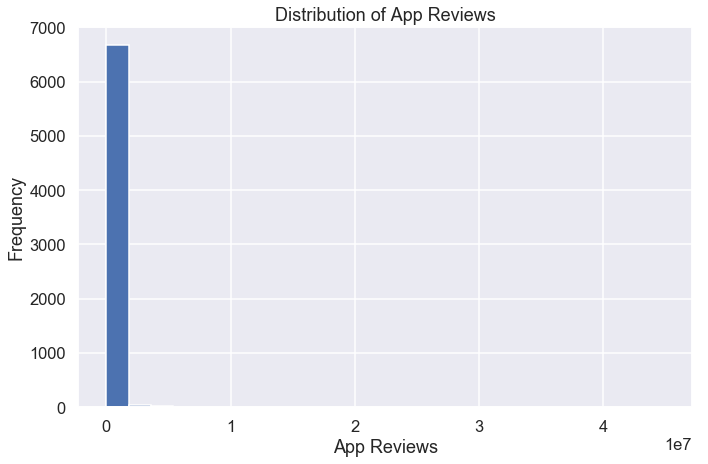

In [36]:
df['Reviews'].plot(kind = 'hist', bins = 25, figsize = (11, 7))
plt.xlabel('App Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of App Reviews')

As we can see, most of the reviews cluster around 0. Logging these values might help us better visualize the distribution. Logging the graph minimizes the effect of outliers, due to the fact that log10(100) = 2 and log10(1000) = 3. Large outliers no longer drive all the variation in the distribution and we can start to visualize differences.

Text(0.5, 1.0, 'Distribution of Log Values of App Reviews')

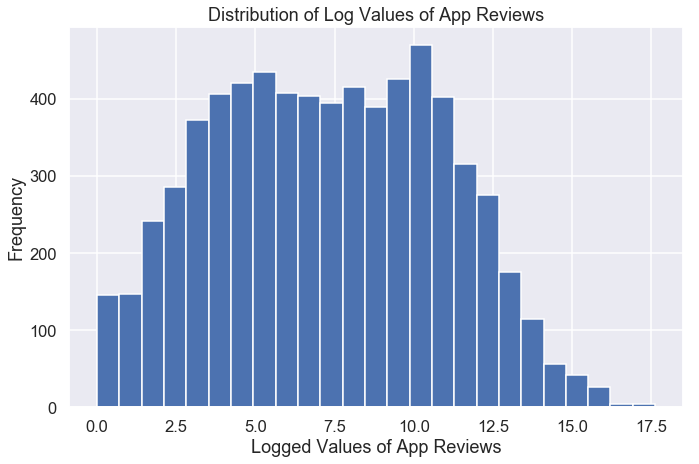

In [37]:
df['log_value_Reviews'] = np.log(df['Reviews'])
df['log_value_Reviews'].plot(kind = 'hist', bins = 25, figsize = (11,7))
plt.xlabel('Logged Values of App Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Log Values of App Reviews')

In [38]:
# Print the max and min of 'Reviews'
minValue = df['Reviews'].min()
maxValue = df['Reviews'].max()
print(" The min # Reviews is:", minValue, '\n', "The max # Reviews is:", maxValue)

 The min # Reviews is: 1.0 
 The max # Reviews is: 44891723.0


In [39]:
# Calculate the mean and median of 'Reviews'
mean = df['Reviews'].mean()
median = df['Reviews'].median()
print(" The mean # Reviews is:", mean, '\n', "The median # Reviews is:", median)

 The mean # Reviews is: 143632.7518075845 
 The median # Reviews is: 1468.0


As we can see from the histogram and data, the data for # of Reviews is __heavily right skewed__, similar to Installs. This means that median would be a better measure of central tendency.

### Secondary independent variables (for possible use in classification)

#### Size

Text(0.5, 1.0, 'Distribution of App Size')

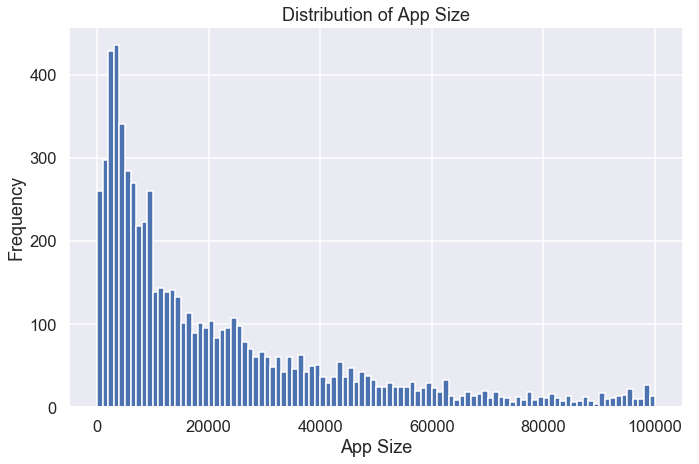

In [40]:
df['Size'].plot(kind = 'hist', bins = 100, figsize = (11, 7))
plt.xlabel('App Size')
plt.ylabel('Frequency')
plt.title('Distribution of App Size')

In [41]:
# Print the max and min of 'Size'
minValue = df['Size'].min()
maxValue = df['Size'].max()
print(" The min Size is:", minValue, '\n', "The max Size is:", maxValue)

 The min Size is: 8.5 
 The max Size is: 100000.0


In [42]:
# Print the mean and median of 'Size'
meanValue = df['Size'].mean()
medianValue = df['Size'].median()
print(" The mean Size is:", meanValue, '\n', "The median Size is:", medianValue)

 The mean Size is: 21686.891028478676 
 The median Size is: 13000.0


As we can see from the histogram and data, the data for Size is __right skewed__. This means that median would be a better measure of central tendency.

#### Price

Text(0.5, 1.0, 'Distribution of App Price')

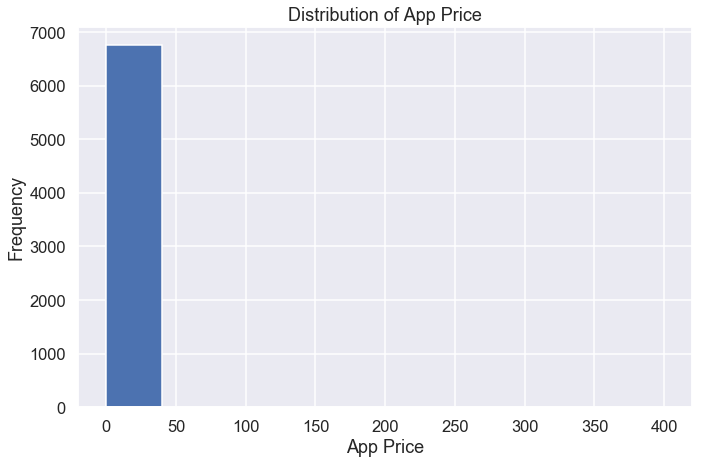

In [43]:
df['Price'].plot(kind = 'hist', figsize = (11, 7))
plt.xlabel('App Price')
plt.ylabel('Frequency')
plt.title('Distribution of App Price')

In [44]:
# Print the max and min of 'Price'
minValue = df['Price'].min()
maxValue = df['Price'].max()
print(" The min Price is:", minValue, '\n', "The max Price is:", maxValue)

 The min Price is: 0.0 
 The max Price is: 400.0


In [45]:
# Print the mean and median of 'Price'
meanValue = df['Price'].mean()
medianValue = df['Price'].median()
print(" The mean Price is:", meanValue, '\n', "The median Price is:", medianValue)

 The mean Price is: 1.2103939796369962 
 The median Price is: 0.0


#### Category

Text(0.5, 1.0, 'Distribution of App Category')

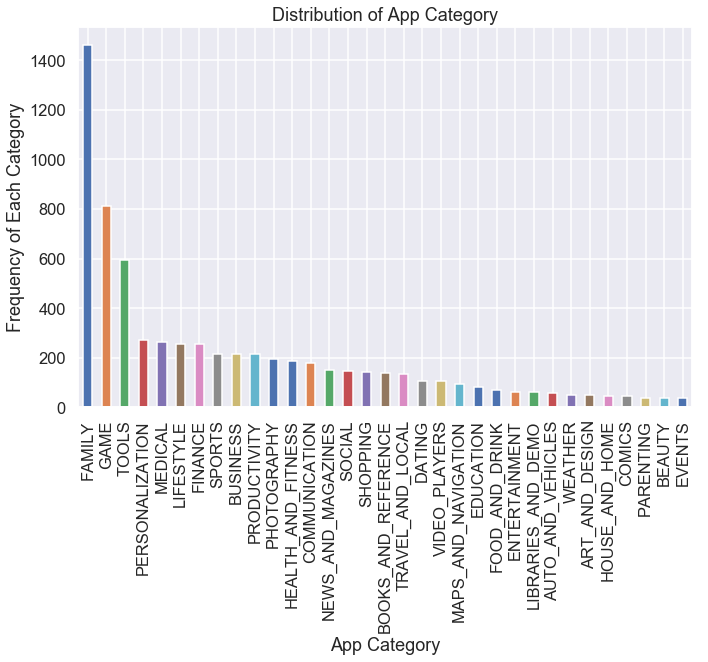

In [46]:
df['Category'].value_counts().plot(kind = 'bar', figsize = (11, 7))
plt.xlabel('App Category')
plt.ylabel('Frequency of Each Category')
plt.title('Distribution of App Category')

### Let's try to explore some relationships between our variables.

In [47]:
# Calculates Pearson correlation coefficient between variables with all observations
df.iloc[:,1:6].corr()

,Rating,Installs,Price,Size,Reviews
Rating,1.00,0.05,-2.06e-02,0.06,6.76e-02
Installs,0.05,1.00,-1.06e-02,0.13,5.95e-01
Price,-0.02,-0.01,1.00e+00,-0.03,-9.02e-03
Size,0.06,0.13,-2.59e-02,1.00,1.86e-01
Reviews,0.07,0.60,-9.02e-03,0.19,1.00e+00


Save for the obvious relationship between word count and char count, there is little correlation between the variables based on Pearson's value.

#### Is there a relationship between _Reviews and Installs_?

In order to justify the use of # of Reviews as a measure of success, we first have to see if there is a valid relationship between it and Installs.

Text(0.5, 1.0, 'Number of Installs vs App Reviews')

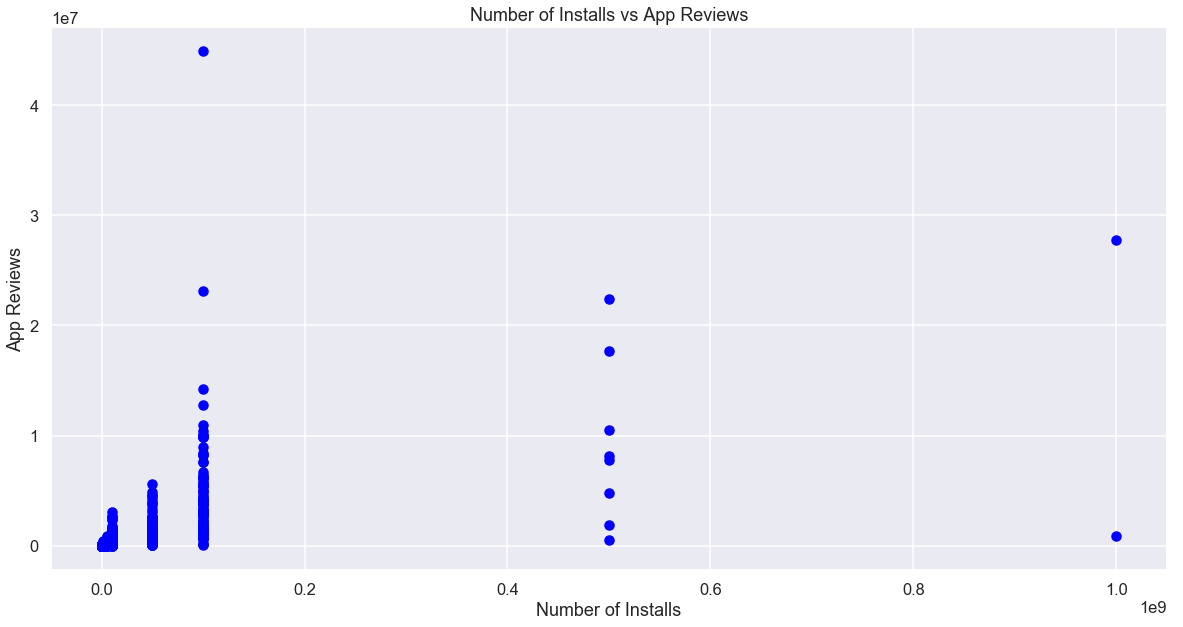

In [48]:
x = df['Installs']
y = df['Reviews']
fig = plt.figure(figsize=(20, 10))
plt.scatter(x, y, c='blue')
plt.xlabel('Number of Installs')
plt.ylabel('App Reviews')
plt.title('Number of Installs vs App Reviews')

The above scatterplot is pretty hard to interpret, so we will use some jittering to better visualize the graph.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Number of Installs vs Reviews')

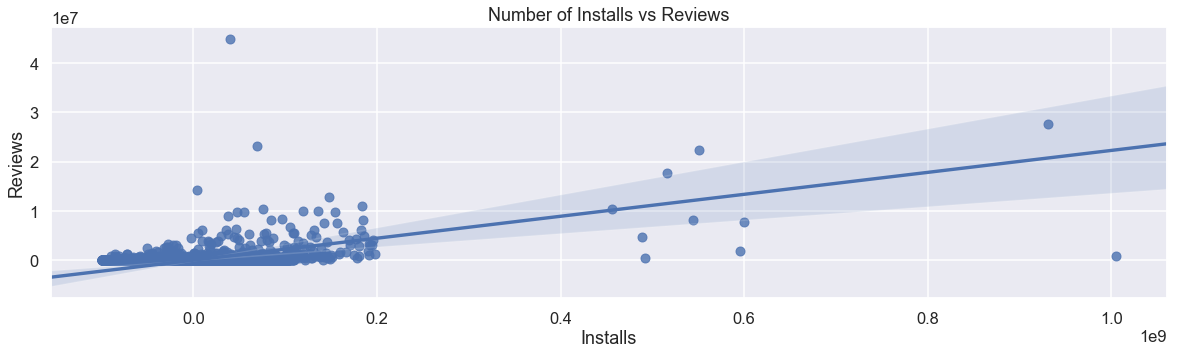

In [49]:
#### MAKE PRETTY ####

fig = plt.figure(figsize=(20, 5))
sns.regplot(x='Installs', y='Reviews', data=df, x_jitter=100000000)
plt.title('Number of Installs vs Reviews')

As we can see, there is a pretty clear positive relationship between reviews and installs, but how correlated are these values?

In [50]:
df[['Reviews', 'Installs']].corr()

,Reviews,Installs
Reviews,1.0,0.6
Installs,0.6,1.0


The correlation coefficient between reviews and installs is 0.6. This is a moderately strong positive linear relationship. We believe that 0.6 is a strong enough correlation coefficient to prove that reviews is a good indicator of installs, since this is not even accounting for the variability within the bins of installs. Therefore, we will be using reviews as a measure of success rather than installs.

#### Is there any relationship between _ratings_ and _reviews_?

Text(0.5, 1.0, 'App Rating vs Number of Reviews')

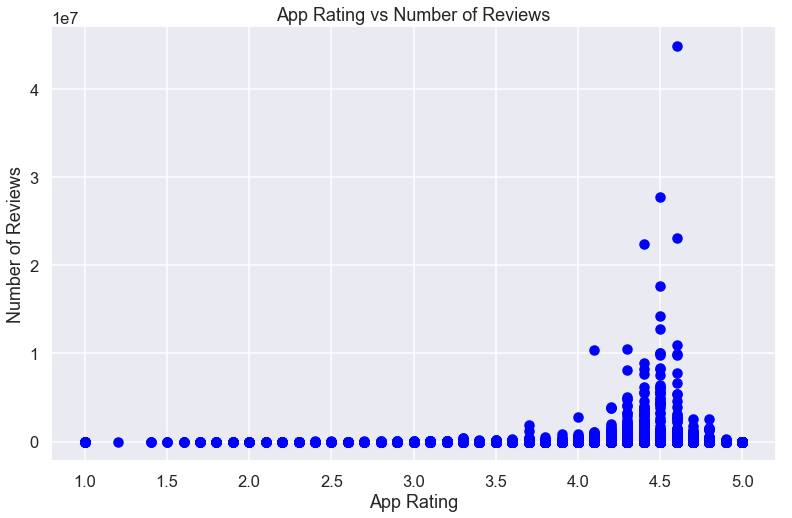

In [51]:
x = df['Rating']
y = df['Reviews']
fig = plt.figure(figsize=(13, 8))
plt.scatter(x, y, c='blue')
plt.xlabel('App Rating')
plt.ylabel('Number of Reviews')
plt.title('App Rating vs Number of Reviews')

Text(0.5, 1.0, 'Rating vs Number of Reviews')

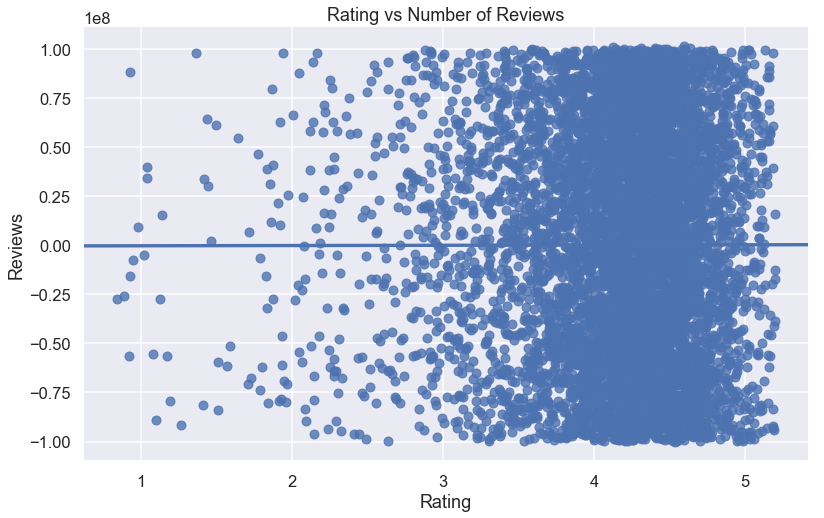

In [52]:
# Use jittering in order to better visualize the above scatter plot 
fig = plt.figure(figsize=(13, 8))
sns.regplot(x='Rating', y='Reviews', data=df, x_jitter=0.2, y_jitter=100000000)
plt.title('Rating vs Number of Reviews')

With installs on the y axis and ratings on the x axis, we can see that the graphs above present a trend. Although not a perfect negative skew, we can see that apps with ratings from 3-5 have a slightly higher number of installs than apps with ratings from 0-2.5. Similar to the installs graph, the flat lines are due to the way the number of installs was categorized into ranges/buckets of values above a certain threshold, like 10,000+ or 50,000+. Therefore, we can observe the lines at 0.5 1e8 and 1 1e8, which mean that some apps with ratings 3-5 had that number of installs.

Text(0.5, 1.0, 'App Rating vs Average Number of Reviews')

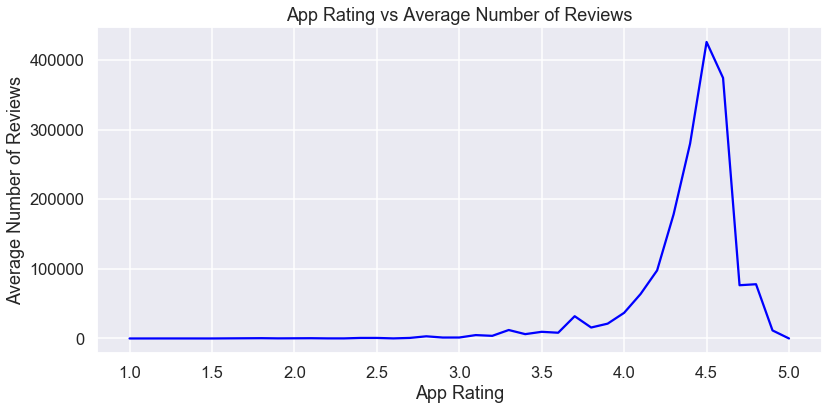

In [53]:
# Plots ratings on the x-axis and average number of installs on the y-axis
df_RvsI = df.groupby('Rating').mean()
x = df_RvsI.index
y = df_RvsI['Reviews']
fig = plt.figure(figsize=(13, 6))
plt.plot(x, y, c='blue')
plt.xlabel('App Rating')
plt.ylabel('Average Number of Reviews')
plt.title('App Rating vs Average Number of Reviews')

As discussed above, we will log the values for the number of Installs to better visualize the data.

Text(0.5, 1.0, 'App Rating vs Average Number of Reviews')

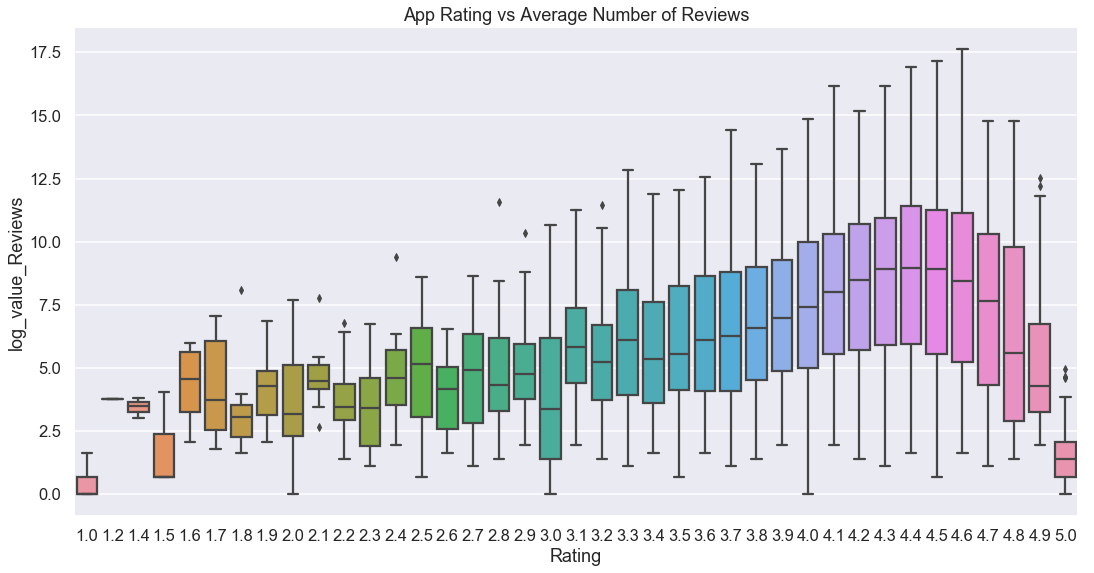

In [54]:
#### MAKE PRETTY ######

# Box-plots ratings on the x-axis and log value of Reviews on the y-axis
fig = plt.figure(figsize=(18, 9))
sns.boxplot(x='Rating', y='log_value_Reviews', data=df)
ax = plt.gca()
plt.title('App Rating vs Average Number of Reviews')

From the above four graphs, we can say that there is strong enough relationship between ratings and installs. As ratings increase, there is a general trend that installs also increases.

Due to this relationship, and the fact that rating as a variable does not vary much (most ratings are between 4 to 5 as demonstrated earlier: with a mean of ~4.17 and a median of 4.3), we decided to utilize only installs as a measure of success for our project.

#### We want to see if there is any trend/correlation between _word count_ and _reviews_.

In [55]:
# Groups apps by the number of words they have, then gets the average number of reviews and displays them
df_new = df.groupby('Word Count').mean()
df_new

,Rating,Installs,Price,Size,...,zx,zy,zz,log_value_Reviews
Word Count,,,,,,,,,
1,4.10,6.16e+06,0.18,19551.93,...,0.0,0.00e+00,0.00e+00,7.47
2,4.07,5.60e+06,0.24,21060.65,...,0.0,2.11e-03,8.42e-03,6.74
3,4.12,4.06e+06,2.04,21828.56,...,0.0,2.00e-03,2.66e-03,7.15
...,...,...,...,...,...,...,...,...,...
6,4.25,3.91e+06,0.87,24353.76,...,0.0,3.71e-03,1.48e-02,7.94
7,4.28,4.66e+06,0.24,23646.12,...,0.0,5.52e-03,1.66e-02,7.73
8,4.27,6.98e+06,0.27,23239.11,...,0.0,3.55e-03,7.09e-03,7.92


Text(0.5, 1.0, 'App Title Word Count vs Average Number of Reviews')

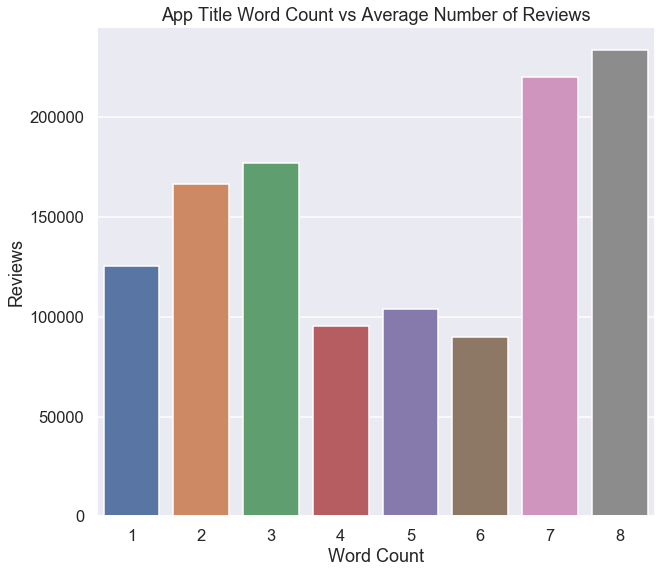

In [56]:
fig = plt.figure(figsize=(10, 9))
# Plots the average number of reviews (y-axis) for apps of each word count (x-axis)
x1 = df_new.index
sns.barplot(x=x1, 
            y='Reviews', 
            data=df_new);
plt.title('App Title Word Count vs Average Number of Reviews')

Text(0.5, 1.0, 'Word Count vs Average Number of Reviews')

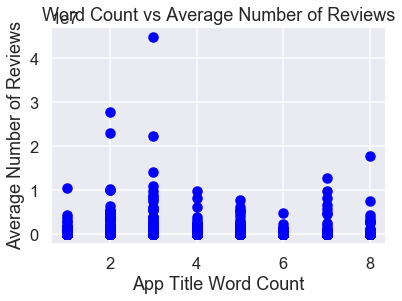

In [57]:
x = df['Word Count']
y = df['Reviews']
plt.scatter(x, y, c='blue')
plt.xlabel('App Title Word Count')
plt.ylabel('Average Number of Reviews')
plt.title('Word Count vs Average Number of Reviews')

Text(0.5, 1.0, 'Word Count vs Number of Reviews')

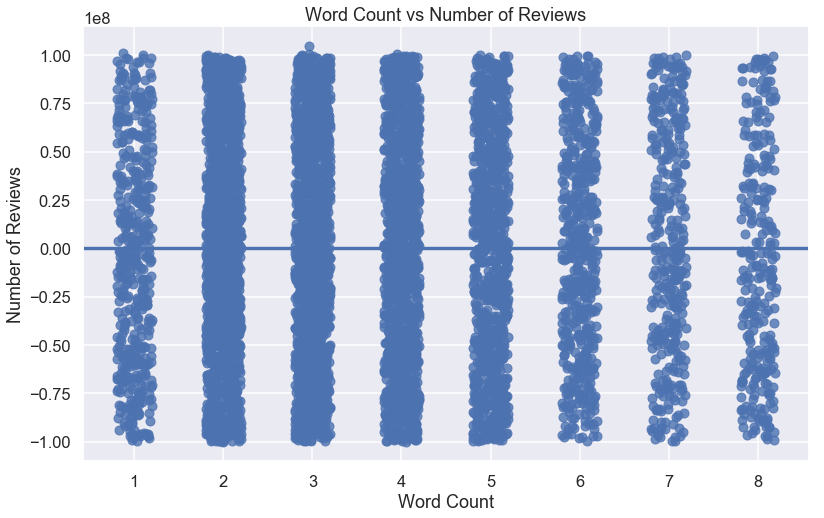

In [58]:
fig = plt.figure(figsize=(13, 8))
sns.regplot(x='Word Count', y='Reviews', data=df, x_jitter=0.2, y_jitter=100000000)
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.title('Word Count vs Number of Reviews')

Text(0.5, 1.0, 'Word Count vs Logged Number of Reviews')

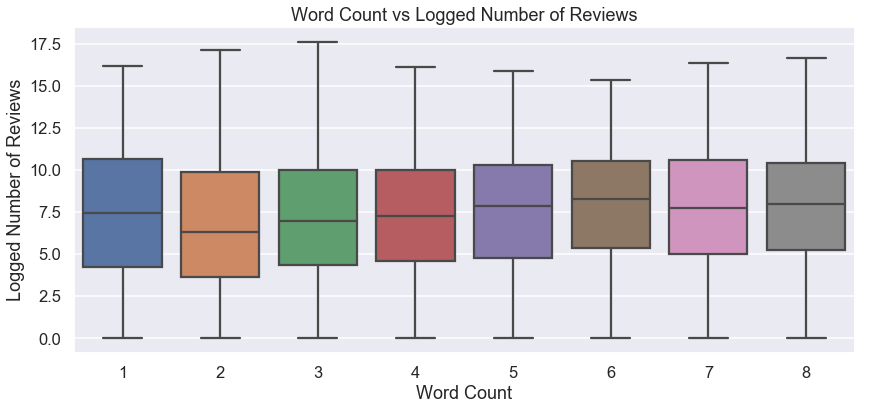

In [59]:
##### make pretty ######

fig = plt.figure(figsize=(14, 6))
sns.boxplot(x='Word Count', y='log_value_Reviews', data=df)
ax = plt.gca()
plt.xlabel('Word Count')
plt.ylabel('Logged Number of Reviews')
plt.title('Word Count vs Logged Number of Reviews')

#### Similarly, what about _char count_ and _reviews_?

In [60]:
# Groups apps by the number of words they have, then gets the average number of reviews and displays them
df_new = df.groupby('Char Count').mean()
df_new

,Rating,Installs,Price,Size,...,zx,zy,zz,log_value_Reviews
Char Count,,,,,,,,,
1,3.95,5.25e+05,0.00,46000.00,...,0.0,0.0,0.0,8.91
2,3.94,2.20e+06,0.04,9768.12,...,0.0,0.0,0.0,5.55
3,3.97,3.53e+07,0.00,21750.00,...,0.0,0.0,0.0,10.32
...,...,...,...,...,...,...,...,...,...
48,4.50,1.00e+05,0.00,13000.00,...,0.0,0.0,0.0,8.94
49,3.70,2.75e+06,0.00,10550.00,...,0.0,0.0,0.0,9.64
52,4.30,1.00e+06,0.00,8600.00,...,0.0,0.0,0.0,10.57


Text(0.5, 1.0, 'Char Count vs Average Number of Reviews')

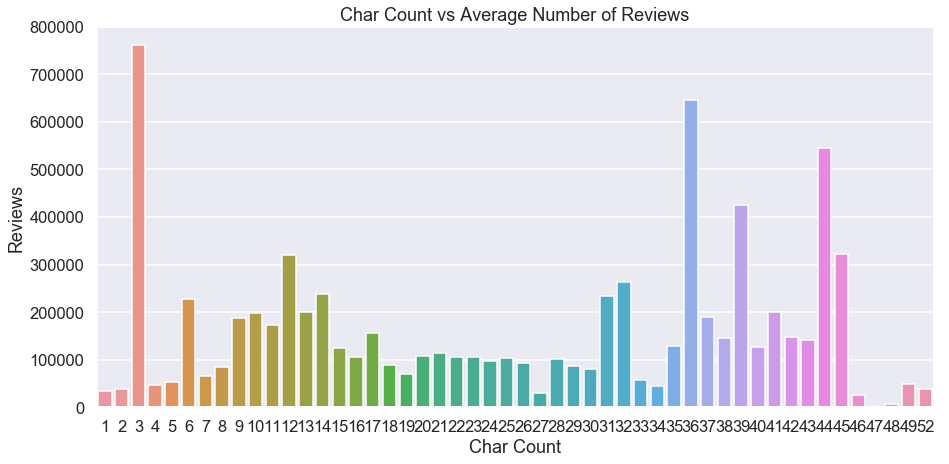

In [61]:
# Plots the average number of reviews (y-axis) for apps of each word count (x-axis)
x1 = df_new.index
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.barplot(x=x1, 
            y='Reviews', 
            data=df_new,
            ax = ax);
plt.title('Char Count vs Average Number of Reviews')

Text(0.5, 1.0, 'Char Count vs Number of Reviews')

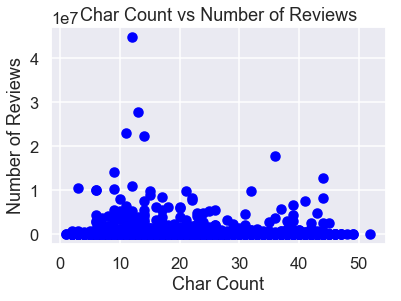

In [62]:
x = df['Char Count']
y = df['Reviews']
plt.scatter(x, y, c='blue')
plt.xlabel('Char Count')
plt.ylabel('Number of Reviews')
plt.title('Char Count vs Number of Reviews')

Text(0.5, 1.0, 'Char Count vs Number of Reviews')

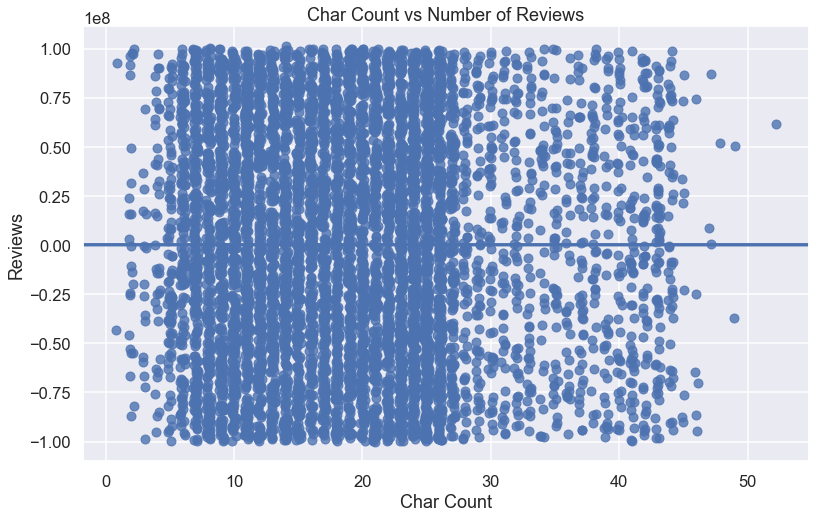

In [63]:
# Use jitering to better visualize the above scatter plot
fig = plt.figure(figsize=(13, 8))
sns.regplot(x='Char Count', y='Reviews', data=df, x_jitter=0.2, y_jitter=100000000)
plt.title('Char Count vs Number of Reviews')

With installs on the y axis and char count on the x axis, we can see that the graph above presents a clear trend. Although not a perfect positive skew, we can see that apps with a char count from 0-50 have a higher number of installs than apps with char counts greater than 50. Similar to the installs graph, the flat lines are due to the way the number of installs was categorized into ranges/buckets of values above a certain threshold, like 10,000+ or 50,000+. Therefore, we can observe the lines at 0.5 1e8 and 1 1e8, which mean that some apps with a char count of 0-50 had that number of installs.

Text(0.5, 1.0, 'Char Count vs Logged Number of Reviews')

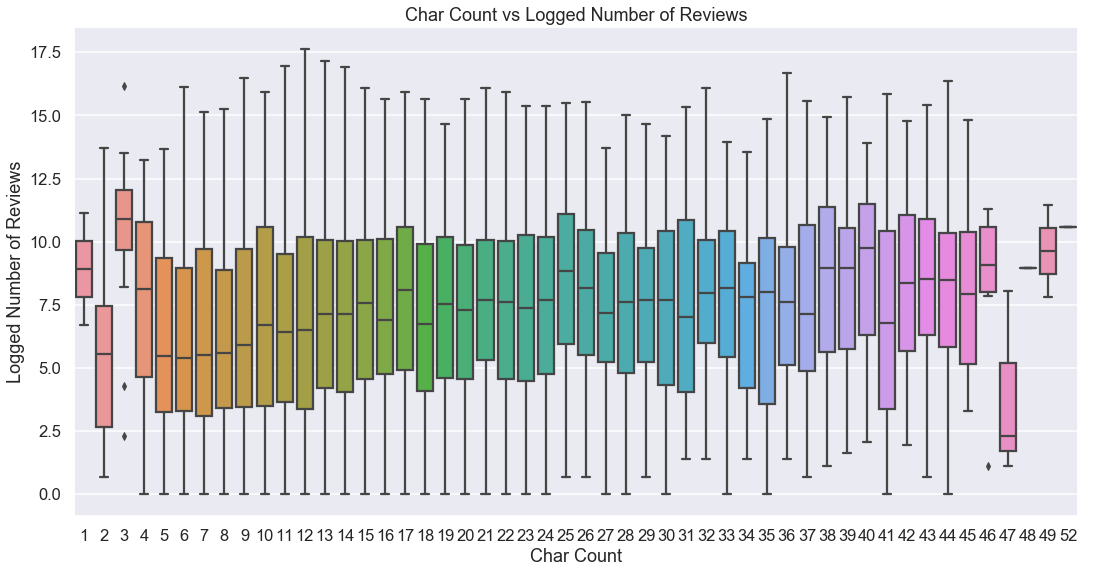

In [64]:
#### make pretty ####

fig = plt.figure(figsize=(18, 9))
sns.boxplot(x='Char Count', y='log_value_Reviews', data=df)
ax = plt.gca()
plt.xlabel('Char Count')
plt.ylabel('Logged Number of Reviews')
plt.title('Char Count vs Logged Number of Reviews')

Now that we found a trend between word count and installs, is there any relationship between rating and word count?

# Data Analysis & Results

Firstly, we will find by Wilcoxon rank sum test which of the letters/combinations of letters are not significant. Remember, we are doing so in order to decrease a chance of a potential multicollinearity problem in our main regression, because all these variables we will apply Wilcoxon test to are binary variables.

In [65]:
import scipy

#First we need a list of insignificant variables that will be useless in our regression

#vector that will contain insignificant columns concerning letters/combinations of letters
insignificant_letters = []

#following peace of code loops through every column from 'a' to 'zz'
#and tests whether 'Reviews' where this letter is present comes 
#from the same distribution as distribution of 'Reviews' where this letter is absent 
for col_name in df.columns[9:159]:     
    
    presence_vector = df[df[col_name]==1]['Reviews']#reviews for which value of col_name is 1
    absence_vector = df[df[col_name]==0]['Reviews']#reviews for which value of col_name is 0
    
    test_stat, pval = scipy.stats.ranksums(presence_vector,absence_vector)
    
    #appending insignificant_letters list if the current column is insignificant at 0.01 level
    if pval > 0.01:
        insignificant_letters.append(col_name)

print(insignificant_letters)

['c', 'f', 'x', 'z', 'ac', 'ai', 'al', 'ap', 'at', 'ay', 'bi', 'ca', 'ce', 'ch', 'ci', 'co', 'ct', 'de', 'di', 'ec', 'ed', 'el', 'em', 'en', 'es', 'et', 'ew', 'fi', 'fo', 'ha', 'he', 'hi', 'ia', 'ic', 'id', 'ie', 'il', 'io', 'is', 'it', 'la', 'le', 'li', 'lo', 'ma', 'mi', 'na', 'nc', 'ni', 'ns', 'nt', 'ob', 'od', 'ol', 'on', 'or', 'ou', 'pa', 'pe', 'pp', 'ri', 'ro', 'rs', 'rt', 'ry', 'se', 'si', 'ss', 'st', 'ta', 'te', 'th', 'ti', 'tr', 'tt', 'tu', 'ty', 'ul', 'um', 'ur', 'us', 'ut', 'vi', 'zy', 'zz']


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4971: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


So, based on the findings in the previous cell we can deduce that columns, that are present in insignificant_letters list are insignificant in explaining success measured as total number of reviews of an app. This fact allows us not to include those variables into regression in order to avoid potential severe multicollinearity.

Thus, we can drop these columns from our dataset.

In [66]:
df.drop(insignificant_letters, axis = 1, inplace = True)

Remember, that we will need to write huge amount of text inside __sm.OLS(_here_)__ . To avoid typing this long text with all variables we need, we will create one list that will caontain all information we need.

In [67]:
df.columns

Index(['App', 'Rating', 'Installs', 'Price', 'Size', 'Reviews', 'Category',
       'Word Count', 'Char Count', 'a', 'b', 'd', 'e', 'g', 'h', 'i', 'k', 'l',
       'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'ad', 'ag', 'am',
       'an', 'ar', 'as', 'bo', 'ck', 'ds', 'ea', 'ee', 'eo', 'er', 'ge', 'ho',
       'ig', 'im', 'in', 'ir', 'iv', 'ke', 'll', 'me', 'nd', 'ne', 'ng', 'oa',
       'oc', 'ok', 'om', 'oo', 'op', 'os', 'ot', 'ow', 'ra', 'rd', 're', 'sh',
       'to', 'ts', 'un', 've', 'zw', 'zx', 'log_value_Reviews'],
      dtype='object')

In [68]:
# reg_list will is final list of all regressors we need
reg_list = list(df.columns[7:-1])
reg_list.append('Price')
reg_list.append('Size')

Now, we are ready to perform OLS regression.

In [69]:
df.columns

Index(['App', 'Rating', 'Installs', 'Price', 'Size', 'Reviews', 'Category',
       'Word Count', 'Char Count', 'a', 'b', 'd', 'e', 'g', 'h', 'i', 'k', 'l',
       'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'ad', 'ag', 'am',
       'an', 'ar', 'as', 'bo', 'ck', 'ds', 'ea', 'ee', 'eo', 'er', 'ge', 'ho',
       'ig', 'im', 'in', 'ir', 'iv', 'ke', 'll', 'me', 'nd', 'ne', 'ng', 'oa',
       'oc', 'ok', 'om', 'oo', 'op', 'os', 'ot', 'ow', 'ra', 'rd', 're', 'sh',
       'to', 'ts', 'un', 've', 'zw', 'zx', 'log_value_Reviews'],
      dtype='object')

In [70]:
import statsmodels.api as sm


model = sm.OLS(endog = df['Reviews'], exog = sm.add_constant(df[reg_list]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     5.839
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.18e-45
Time:                        23:59:50   Log-Likelihood:            -1.0323e+05
No. Observations:                6777   AIC:                         2.066e+05
Df Residuals:                    6709   BIC:                         2.071e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.523e+04    3.8e+04      0.664      0.5

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


As we can see from Warnings in OLS summary, there is still a problem with multicollinearity. We will now build F-test for testing mutual insignificance of all letter regressors whose p-values are greater than 0.15 to see whether we can delete them from the set of the regressors.

In [71]:
hypothesis = '(b = 0),(d = 0), (g = 0), (h = 0), (p = 0), (r = 0), (v = 0), (w = 0), (y = 0), (bo = 0), (eo = 0), (ge = 0), (in = 0), (nd = 0), (oc = 0), (un = 0), (k = 0), (l = 0), (m = 0), (n = 0),(o = 0),(s = 0),(u = 0),(ad = 0),(an = 0),(ck = 0),(ds = 0),(ea = 0),(ee = 0),(ho = 0),(ig = 0),(im = 0),(ke = 0),(me = 0),(ne = 0),(ng = 0),(oa = 0),(ok = 0),(om = 0),(oo = 0),(op = 0),(os = 0),(ot = 0),(ow = 0),(ra = 0),(rd = 0),(re = 0),(to = 0),(ts = 0),(zw = 0)'
f_test = results.f_test(hypothesis)
print(f_test)

<F test: F=array([[0.62098706]]), p=0.9825682509276125, df_denom=6709, df_num=49>


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 49
  'rank is %d' % (J, J_), ValueWarning)


The p-value of F-test is nearly one, thus, we cannot reject the null hypothesis that the variables contained in _hypothesis_ in the cell above are mutually insignificant in our regression. So we can delete them from our regression without loss of main results.


In [72]:
reg_list.remove('b')
reg_list.remove('d')
reg_list.remove('g')
reg_list.remove('h')
reg_list.remove('p')
reg_list.remove('r')
reg_list.remove('v')
reg_list.remove('w')
reg_list.remove('y')
reg_list.remove('bo')
reg_list.remove('eo')
reg_list.remove('ge')
reg_list.remove('in')
reg_list.remove('nd')
reg_list.remove('oc')
reg_list.remove('un')
reg_list.remove('k')
reg_list.remove('l')
reg_list.remove('m')
reg_list.remove('n')
reg_list.remove('o')
reg_list.remove('s')
reg_list.remove('u')
reg_list.remove('ad')
reg_list.remove('an')
reg_list.remove('ck')
reg_list.remove('ds')
reg_list.remove('ea')
reg_list.remove('ee')
reg_list.remove('ho')
reg_list.remove('ig')
reg_list.remove('im')
reg_list.remove('ke')
reg_list.remove('me')
reg_list.remove('ne')
reg_list.remove('ng')
reg_list.remove('oa')
reg_list.remove('ok')
reg_list.remove('om')
reg_list.remove('oo')
reg_list.remove('op')
reg_list.remove('os')
reg_list.remove('ot')
reg_list.remove('ow')
reg_list.remove('ra')
reg_list.remove('rd')
reg_list.remove('re')
reg_list.remove('to')
reg_list.remove('ts')
reg_list.remove('zw')


Now we are ready to run new regression with corrected list of independent variables to hope to avoid multicollinearity problem.

In [73]:
model = sm.OLS(endog = df['Reviews'], exog = sm.add_constant(df[reg_list]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     20.10
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           5.83e-64
Time:                        23:59:50   Log-Likelihood:            -1.0324e+05
No. Observations:                6777   AIC:                         2.065e+05
Df Residuals:                    6758   BIC:                         2.067e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.001e+04   3.58e+04      0.837      0.4

As we can see again from Warnings in OLS summary, there is still a problem with multicollinearity. We will now again build F-test for testing mutual insignificance of all remaining letter regressors whose p-values are greater than 0.05 to see whether we can delete them from the set of the regressors.

In [74]:
hypothesis = '(a = 0),(am = 0), (ir = 0), (ll = 0), (zx = 0)'
f_test = results.f_test(hypothesis)
print(f_test)

<F test: F=array([[2.84324049]]), p=0.022753334212775374, df_denom=6758, df_num=4>


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)


As we can see from the results of the F-test, low p-value (lower than 0.025) allows us to reject the null hypothesis that 'a','am,'ir','ll','zx' are mutually insignificant. Now we find such a subset from these variables that they will be mutually independent.

In [75]:
hypothesis = '(ll = 0),(ir = 0), (zx = 0)'
f_test = results.f_test(hypothesis)
print(f_test)

<F test: F=array([[2.59691545]]), p=0.07457737972784234, df_denom=6758, df_num=2>


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


By the results of another F-test, we are allowed to drop 'll', 'ir','zx' from list of regressors.

In [76]:
reg_list.remove('ll')
reg_list.remove('ir')
reg_list.remove('zx')

In [77]:
model = sm.OLS(endog = df['Reviews'], exog = sm.add_constant(df[reg_list]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     22.28
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           3.11e-64
Time:                        23:59:50   Log-Likelihood:            -1.0324e+05
No. Observations:                6777   AIC:                         2.065e+05
Df Residuals:                    6760   BIC:                         2.066e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.863e+04   3.58e+04      0.799      0.4

As it can be seen fron Warnings of the regression, there is still a multicollinearity problem. We have made good efforts to avoid it, but it is still present. We will continue our analysis having in mind this problem.

Now let's test another OLS assumption, i.e. homoscedasticity of errors. To do so, we will buils a Breusch-Pagan test. The null hypothesis is that the variance of errors of regression is homoscedastic.

In [78]:
import statsmodels
br_pagan_results = statsmodels.stats.diagnostic.het_breuschpagan(results.resid,sm_non_formula.add_constant(df[reg_list]))
print(br_pagan_results)

NameError: name 'sm_non_formula' is not defined

The number we need to take into account is the second number from the list above. This is the p-value of Breusch-Pagan test that indicates that the null hypothesis of homoscedasticity in errors can be rejected(p_value is almost zero). Thus, we need to build another regression with standard errors robust to heteroscedasticity.

In [ ]:
model = sm.OLS(endog = df['Reviews'], exog = sm.add_constant(df[reg_list]))
results = model.fit(cov_type = 'HC3', use_t = None)
print(results.summary())

Regression above is the final version of regressio; unfortunately we were unable to avoid multicollinearity problem, but still our results are valid.
Here we discuss partially our main findings:
(we assume significance level to be 0.05)

1) variables that are not connected with title(i.e. Size and Price): Size appears to be significant explanator of apps success measured as total number of reviews for the app, whereas Price is not significant.

2) length of title(either Char count or Word count) appears to be completely insignificant in explaining apps success(both Word count and Char count have extremely large p-values)

3) concerning specific letters/combinations of letter:     
   The following variables are insignificant: 'as', 'ag';
   The following variables tend to be present in less successful apps(their coefficients are negative): 've', 'ar', 'am', 't',
   'i', 'e';
   The following variables tend to be present in more successful apps(their coefficients are positive): 'sh', 'iv', 'er', 'a';

# Ethics & Privacy

The dataset we obtained has an adequate amount of observations and very related variables that helps us to measure the success of the app. We obtained the dataset from Kaggle, a site that allows user to use and publish dataset, and the dataset we use is attached with license that granted user freedom to copy, redistribute, and build upon the material. (license link: https://creativecommons.org/licenses/by/3.0/) Since the dataset is built upon data that’s public in the Google Play Store where all users can see directly, there’s no potential privacy issue.

Since the dataset we used contains pre-processed information like sentiment, sentiment polarity and sentiment subject, which may contain bias that’s unknown to us because we can’t see how they are calculated. Therefore we didn't use this information in our analysis. Since our data comes from google play store, it mainly focus on the population that using Android system phone. 

We intended to build a tool that measures the success of an app to offer reference or advise for people who might develop an app themselves. Since our data only contains public information and not any personal information, and we are only analyzing the existing data, there won't be anybody who may exploit or use as harmful purpose. Possible impacts of our work are that people may change their decision about the name of the app they are developing, or people may change their opinions about certain app. However, our analysis shows that title can be a limited factor deciding on an app's success, so there won't be any unintended consequences. 


# Conclusion & Discussion